# Stroke prediction

### ABOUT DATASET : Stroke Prediction

> According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

----

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('C:\\Users\\sanja\\datascience sairasnotes\\datasets\\stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


> categorical and numerical data     
> cat: gender, ever_married, work_type, residence_type, smoking_status       
> num: age, avg_glucose_level, bmi          
> binary num : hypertension, heart_disease, stroke        

In [4]:
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [5]:
duplicates=df[df.duplicated()]
duplicates.shape

(0, 12)

> No duplicates

In [6]:
# checking for null values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
# getting null value percentage
NA_percentage=100*df.isnull().sum()/len(df)
NA_percentage

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

> Bmi has 201 NaN values, 3.9%. Should it be dropped? 

In [8]:
df['stroke'].value_counts()
# no of patients with and without stroke 

0    4861
1     249
Name: stroke, dtype: int64

In [9]:
# checking if bmi with null value is important to stroke prediction
len(df[df['bmi'].isna() & df['stroke']==1])
# no of patients with stroke==1 and bmi ==NaN value

40

> Out of 249 with stroke 40 has missing value in bmi   ,16 %       
> Cannot drop bmi feature

#### Dropping Id feature

In [10]:
df=df.drop(['id'],axis=1)

In [11]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Handling Missing Value in BMI with median

In [12]:
df['bmi']=df['bmi'].fillna(np.round(df['bmi'].median(),1))

In [13]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Outlier Detection and HAndling

<AxesSubplot:>

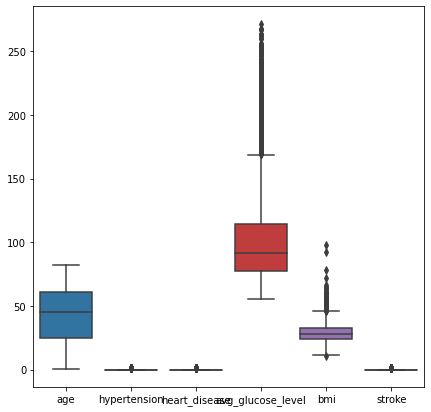

In [14]:
plt.figure(figsize=(7,7))
sns.boxplot(data=df)

> There are outliers in bmi and avg_glucose_level.  

### outlier handling for bmi

In [15]:
q1_bmi=df.bmi.quantile(0.25)
q1_bmi

23.8

In [16]:
q3_bmi=df.bmi.quantile(0.75)
q3_bmi

32.8

In [17]:
IQR_bmi=q3_bmi-q1_bmi
IQR_bmi

8.999999999999996

In [18]:
lower_bmi=q1_bmi-1.5*IQR_bmi
lower_bmi

10.300000000000006

In [19]:
upper_bmi=q3_bmi+1.5*IQR_bmi
upper_bmi

46.29999999999999

> BMI : values above 46.2 and below 10 are outliers   


In [20]:
outlier_bmi=df[(df.bmi>upper_bmi)|(df.bmi<lower_bmi)]
outlier_bmi

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
21,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
66,Female,70.0,0,0,Yes,Private,Urban,221.58,47.5,never smoked,1
113,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1
254,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
258,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
4906,Female,53.0,0,0,Yes,Private,Urban,70.51,54.1,never smoked,0
4952,Male,51.0,1,0,Yes,Self-employed,Rural,211.83,56.6,never smoked,0
5009,Female,50.0,0,0,Yes,Self-employed,Rural,126.85,49.5,formerly smoked,0
5057,Female,49.0,0,0,Yes,Govt_job,Urban,69.92,47.6,never smoked,0


In [21]:
no_outlier_bmi=df[(df.bmi>lower_bmi)&(df.bmi<upper_bmi)]
no_outlier_bmi

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [22]:
df=no_outlier_bmi
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### outlier handling for avg_glucose_level

In [23]:
q1_agl=df.avg_glucose_level.quantile(0.25)
q1_agl

77.1975

In [24]:
q3_agl=df.avg_glucose_level.quantile(0.75)
q3_agl

113.755

In [25]:
IQR_agl=q3_agl-q1_agl
IQR_agl

36.55749999999999

In [26]:
lower_agl=q1_agl-1.5*IQR_agl
lower_agl

22.36125000000002

In [27]:
upper_agl=q3_agl+1.5*IQR_agl
upper_agl

168.59124999999997

> Avg_glucose_level : values above 168 and below 22 are outliers

In [28]:
outlier_agl=df[(df.avg_glucose_level>upper_agl)|(df.avg_glucose_level<lower_agl)]
outlier_agl

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5061,Male,41.0,0,0,Yes,Private,Urban,223.78,32.3,never smoked,0
5062,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0
5063,Male,39.0,0,0,Yes,Private,Urban,179.38,27.7,Unknown,0
5064,Male,70.0,0,0,Yes,Self-employed,Rural,193.88,24.3,Unknown,0


In [29]:
no_outlier_agl=df[(df.avg_glucose_level>lower_agl)&(df.avg_glucose_level<upper_agl)]
no_outlier_agl

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.1,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [30]:
df=no_outlier_agl
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.1,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


<AxesSubplot:>

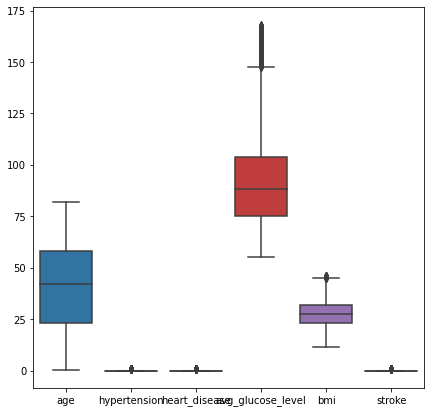

In [31]:
plt.figure(figsize=(7,7))
sns.boxplot(data=df)

> Ouliers handled for bmi and avg_glucose_level

## EXPLORATORY DATA ANALYSIS

In [32]:
colors=['#fe346e','grey','#9F79EE','#551A8B']
palette=sns.color_palette(palette=colors)

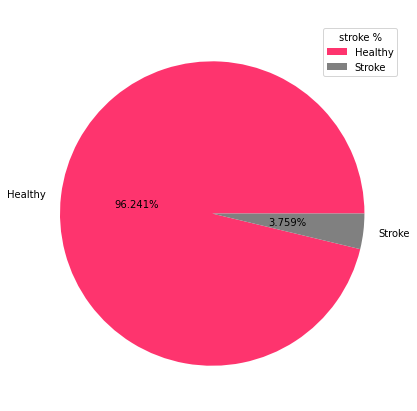

In [33]:
plt.figure(figsize=(7,7))
plt.title("Number of people having stroke",{'font':'Serif','size':'14','weight':'bold','color':'white'})
plt.pie(df['stroke'].value_counts(),labels=['Healthy','Stroke'],autopct="%0.3f%%",pctdistance=.5,colors=colors)
plt.legend(title='stroke %')

> **Unbalanced dataset**

<AxesSubplot:>

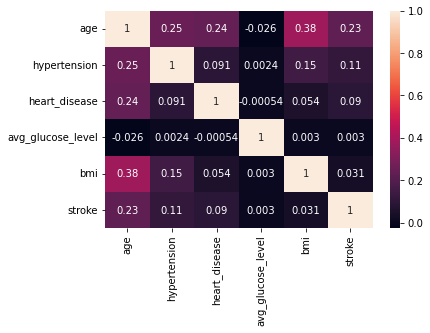

In [34]:
sns.heatmap(df.corr(),annot=True)

> Bmi and Age has higher positive correlation (followed by age-hypertension, age-heart disease, age-stroke)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'stroke'}>]], dtype=object)

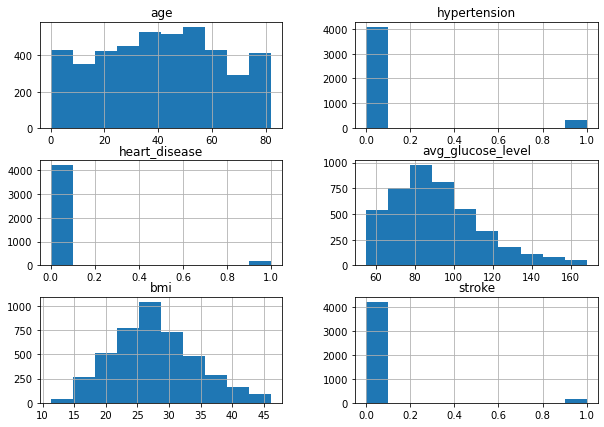

In [35]:
df.hist(figsize=(10,7))

[Text(0, 0, 'never smoked'),
 Text(1, 0, 'Unknown'),
 Text(2, 0, 'smokes'),
 Text(3, 0, 'formerly smoked')]

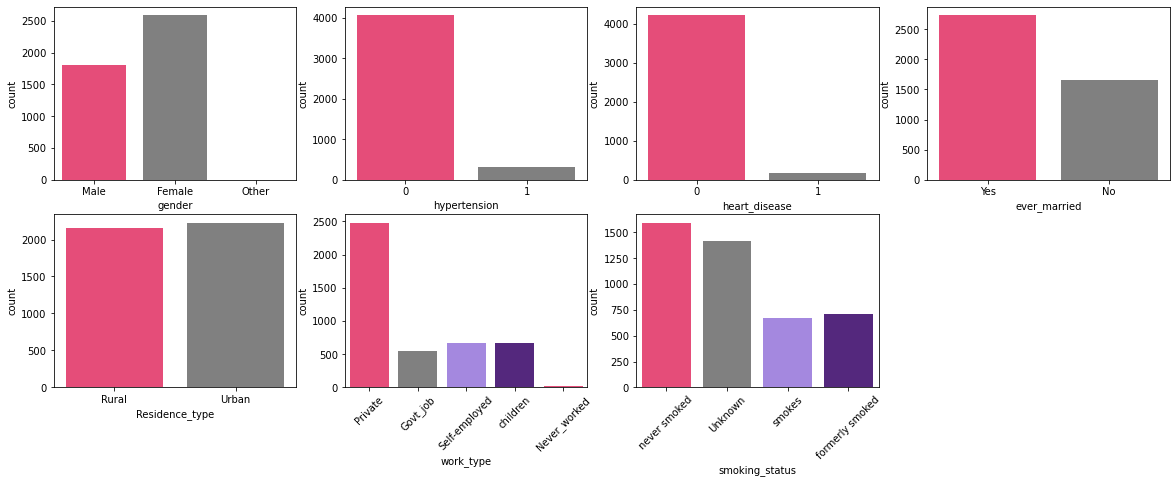

In [36]:
# count plot for categorical features
plt.figure(figsize=(20,7))
plt.subplot(2,4,1)
sns.countplot(data=df,x='gender',palette=palette)

plt.subplot(2,4,2)
sns.countplot(data=df,x='hypertension',palette=palette)

plt.subplot(2,4,3)
sns.countplot(data=df,x='heart_disease',palette=palette)

plt.subplot(2,4,4)
sns.countplot(data=df,x='ever_married',palette=palette)

plt.subplot(2,4,5)
sns.countplot(data=df,x='Residence_type',palette=palette)

plt.subplot(2,4,6)
work=sns.countplot(data=df,x='work_type',palette=palette)
work.set_xticklabels(work.get_xticklabels(),rotation=45)

plt.subplot(2,4,7)
smoke=sns.countplot(data=df,x='smoking_status',palette=palette)
smoke.set_xticklabels(smoke.get_xticklabels(),rotation=45)

> * Female patients are more than Male            
> * Less people have hypertension and Heart disease. 
> * Married patients are more than unmarried in the dataset. 
> * Patients are mostly working in the private sector.
> * People who never smoked is more. 

[Text(0, 0, 'never smoked'),
 Text(1, 0, 'Unknown'),
 Text(2, 0, 'smokes'),
 Text(3, 0, 'formerly smoked')]

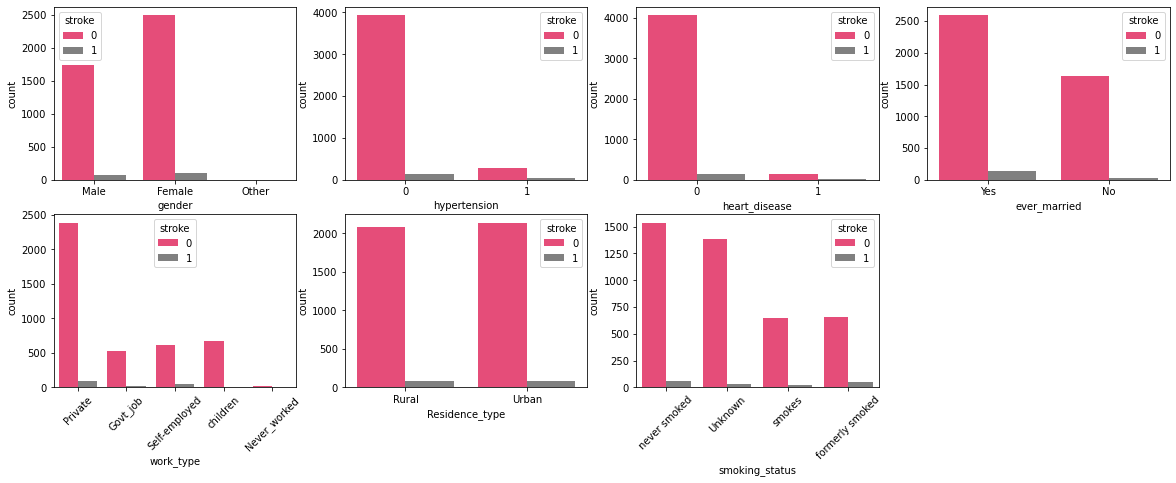

In [37]:
# stroke effect on the categorical features
plt.figure(figsize=(20,7))
plt.subplot(2,4,1)
sns.countplot(data=df,x='gender',hue='stroke',palette=palette)

plt.subplot(2,4,2)
sns.countplot(data=df,x='hypertension',hue='stroke',palette=palette)

plt.subplot(2,4,3)
sns.countplot(data=df,x='heart_disease',hue='stroke',palette=palette)

plt.subplot(2,4,4)
sns.countplot(data=df,x='ever_married',hue='stroke',palette=palette)

plt.subplot(2,4,5)
work1=sns.countplot(data=df,x='work_type',hue='stroke',palette=palette)
work1.set_xticklabels(work1.get_xticklabels(),rotation=45)

plt.subplot(2,4,6)
sns.countplot(data=df,x='Residence_type',hue='stroke',palette=palette)

plt.subplot(2,4,7)
smoke1=sns.countplot(data=df,x='smoking_status',hue='stroke',palette=palette)
smoke1.set_xticklabels(smoke1.get_xticklabels(),rotation=45)

> * Risk of stroke is almost same for both male and female. Females are slighly more prone to stroke.   
> * People who dont have hypertension has more chance of not having stroke.   Data also shows patients with hypertension can get stroke.   
> * According to this data , heart disease dont necessarily cause stroke.   Data also shows patients with heart disease can get stroke    
> * Married patients are more prone to stroke .  
> * Living in urban or rural dont seem to increase chance of stroke.


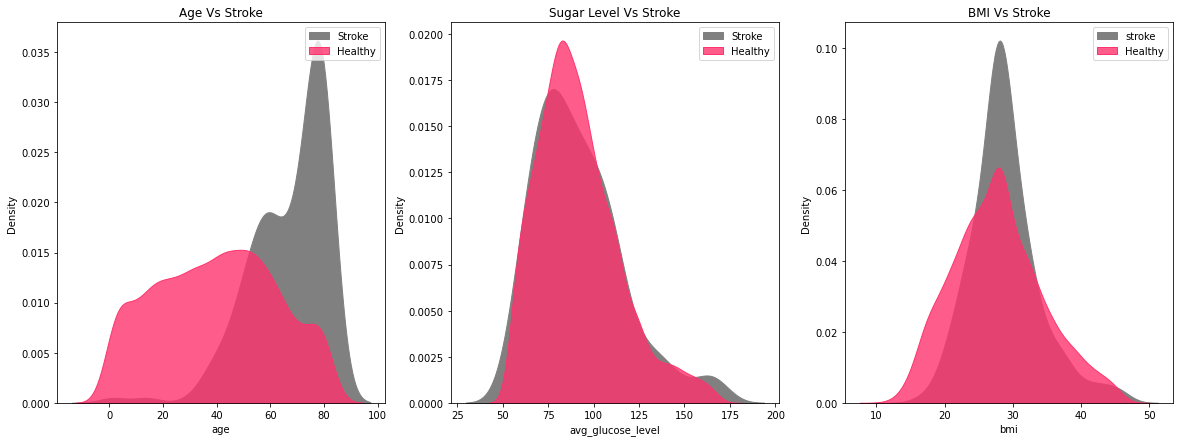

In [38]:
# Checking how Age, BMI, Average Glucose level effect stroke
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.title('Age Vs Stroke')
sns.kdeplot(data=df[df['stroke']==1],x='age',alpha=1,color='grey',shade=True,label='Stroke')
sns.kdeplot(data=df[df['stroke']==0],x='age',alpha=0.8,color='#fe346e',shade=True,label='Healthy')
plt.legend()

plt.subplot(1,3,2)
plt.title('Sugar Level Vs Stroke')
sns.kdeplot(data=df[df['stroke']==1],x='avg_glucose_level',alpha=1,color='grey',shade=True,label='Stroke')
sns.kdeplot(data=df[df['stroke']==0],x='avg_glucose_level',alpha=0.8,color='#fe346e',shade=True,label='Healthy')
plt.legend()

plt.subplot(1,3,3)
plt.title('BMI Vs Stroke')
sns.kdeplot(data=df[df['stroke']==1],x='bmi',alpha=1,color='grey',shade=True,label='stroke')
sns.kdeplot(data=df[df['stroke']==0],x='bmi',alpha=0.8,color='#fe346e',shade=True,label='Healthy')
plt.legend()

> * People above age 50 have high chance of stroke      

> * According to med.data :Glucose<70 =Below normal level, 90<Glucose level<140 = Normal , 140 < Glucose < 199 : prediabetic ,Glucose level > 200 =Diabetic     
> * **Most people are below healthy range and healthy range , Some with stroke are pre-diabetics** 

> * People with bmi between ~ 25 above(25<BMI<29: Overweight ,BMI>30 : Obese according to NIH) had higher risk of stroke      
> * **Higher stroke risk for overweight and obese people**


> **AGE is main factor determining chances of having stroke according to dataset**

## Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [40]:
df=df.apply(encoder.fit_transform)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,101,0,1,1,2,0,2444,197,2,1
6,1,95,1,1,1,2,0,579,146,2,1
7,0,90,0,0,0,2,1,1919,100,2,1
8,0,80,0,0,1,2,0,898,153,0,1
9,0,99,0,0,1,2,1,123,114,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,101,1,0,1,2,1,1338,153,2,0
5106,0,102,0,0,1,3,1,2982,272,2,0
5107,0,56,0,0,1,3,0,1294,178,2,0
5108,1,72,0,0,1,2,0,3309,128,1,0


## Splitting to Test and Train Data 

In [41]:
x=df.iloc[:,:-1].values
x

array([[   1,  101,    0, ..., 2444,  197,    2],
       [   1,   95,    1, ...,  579,  146,    2],
       [   0,   90,    0, ..., 1919,  100,    2],
       ...,
       [   0,   56,    0, ..., 1294,  178,    2],
       [   1,   72,    0, ..., 3309,  128,    1],
       [   0,   65,    0, ..., 1429,  134,    0]], dtype=int64)

In [42]:
y=df.iloc[:,-1].values
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [45]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (3512, 10)
x_test (878, 10)
y_train (3512,)
y_test (878,)


## Scaling data

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [49]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## Balancing dataset with SMOTE(Synthetic Minority Oversampling Technique)

> Data has to be balanced before applying models since the dataset is hugely unbalanced

In [50]:
#pip install imbalanced-learn

In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
smote=SMOTE(random_state=0)

In [53]:
x_train_res,y_train_res=smote.fit_resample(x_train,y_train)

In [54]:
print("Shape of oversampled data : x_train :",x_train_res.shape,"y_train :",y_train_res.shape)

Shape of oversampled data : x_train : (6752, 10) y_train : (6752,)


In [55]:
print("Before oversampling: stroke=1 ",sum(y_train==1))
print("Before oversampling: stroke=0 ",sum(y_train==0))
print("---------------------")
print("After oversampling : stroke=1 ",sum(y_train_res==1))
print("After oversampling : stroke=0 ",sum(y_train_res==0))

Before oversampling: stroke=1  136
Before oversampling: stroke=0  3376
---------------------
After oversampling : stroke=1  3376
After oversampling : stroke=0  3376


> Data is now balanced!!

## APPLYING MODELS

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### 1.Logistic Regression

In [58]:
lr=LogisticRegression(random_state=0)
lr.fit(x_train_res,y_train_res)
ypred_lr=lr.predict(x_test)
accuracy_lr=np.round(accuracy_score(y_test,ypred_lr)*100,2)

In [59]:
print("Accuracy :",accuracy_lr,"%")
print("Confusion matrix :\n",confusion_matrix(y_test,ypred_lr))
print("Classification report :\n",classification_report(y_test,ypred_lr))

Accuracy : 73.12 %
Confusion matrix :
 [[619 230]
 [  6  23]]
Classification report :
               precision    recall  f1-score   support

           0       0.99      0.73      0.84       849
           1       0.09      0.79      0.16        29

    accuracy                           0.73       878
   macro avg       0.54      0.76      0.50       878
weighted avg       0.96      0.73      0.82       878



### 2.Decision Tree Classifier

In [60]:
dtc=DecisionTreeClassifier(random_state=0)
dtc.fit(x_train_res,y_train_res)
ypred_dtc=dtc.predict(x_test)
accuracy_dtc=np.round(accuracy_score(y_test,ypred_dtc)*100,2)

In [61]:
print("Accuracy :",accuracy_dtc,"%")
print("Confusion matrix :\n",confusion_matrix(y_test,ypred_dtc))
print("Classification report :\n",classification_report(y_test,ypred_dtc))

Accuracy : 89.41 %
Confusion matrix :
 [[779  70]
 [ 23   6]]
Classification report :
               precision    recall  f1-score   support

           0       0.97      0.92      0.94       849
           1       0.08      0.21      0.11        29

    accuracy                           0.89       878
   macro avg       0.53      0.56      0.53       878
weighted avg       0.94      0.89      0.92       878



### 3.Random Forest Classifier

In [62]:
rfc=RandomForestClassifier(n_estimators=100,random_state=0)
rfc.fit(x_train_res,y_train_res)
ypred_rfc=rfc.predict(x_test)
accuracy_rfc=np.round(accuracy_score(y_test,ypred_rfc)*100,2)

In [63]:
print("Accuracy :",accuracy_rfc,"%")
print("Confusion matrix :\n",confusion_matrix(y_test,ypred_rfc))
print("Classification report :\n",classification_report(y_test,ypred_rfc))

Accuracy : 93.74 %
Confusion matrix :
 [[822  27]
 [ 28   1]]
Classification report :
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       849
           1       0.04      0.03      0.04        29

    accuracy                           0.94       878
   macro avg       0.50      0.50      0.50       878
weighted avg       0.94      0.94      0.94       878



### 4.AdaBoost Classifier

In [64]:
adb=AdaBoostClassifier(n_estimators=100,random_state=0)
adb.fit(x_train_res,y_train_res)
ypred_adb=adb.predict(x_test)
accuracy_adb=np.round(accuracy_score(y_test,ypred_adb)*100,2)

In [65]:
print("Accuracy :",accuracy_adb,"%")
print("Confusion matrix :\n",confusion_matrix(y_test,ypred_adb))
print("Classification report :\n",classification_report(y_test,ypred_adb))

Accuracy : 87.59 %
Confusion matrix :
 [[755  94]
 [ 15  14]]
Classification report :
               precision    recall  f1-score   support

           0       0.98      0.89      0.93       849
           1       0.13      0.48      0.20        29

    accuracy                           0.88       878
   macro avg       0.56      0.69      0.57       878
weighted avg       0.95      0.88      0.91       878



### 5.SVC :linear

In [66]:
svc1=SVC(kernel='linear')
svc1.fit(x_train_res,y_train_res)
ypred_svc1=svc1.predict(x_test)
accuracy_svc1=np.round(accuracy_score(y_test,ypred_svc1)*100,2)

In [67]:
print("Accuracy :",accuracy_svc1,"%")
print("Confusion matrix :\n",confusion_matrix(y_test,ypred_svc1))
print("Classification report :\n",classification_report(y_test,ypred_svc1))

Accuracy : 70.84 %
Confusion matrix :
 [[599 250]
 [  6  23]]
Classification report :
               precision    recall  f1-score   support

           0       0.99      0.71      0.82       849
           1       0.08      0.79      0.15        29

    accuracy                           0.71       878
   macro avg       0.54      0.75      0.49       878
weighted avg       0.96      0.71      0.80       878



### 6. SVC : Non-linear

In [68]:
svc2=SVC(kernel='poly')
svc2.fit(x_train_res,y_train_res)
ypred_svc2=svc2.predict(x_test)
accuracy_svc2=np.round(accuracy_score(y_test,ypred_svc2)*100,2)

In [69]:
print("Accuracy :",accuracy_svc2,"%")
print("Confusion matrix :\n",confusion_matrix(y_test,ypred_svc2))
print("Classification report :\n",classification_report(y_test,ypred_svc2))

Accuracy : 77.68 %
Confusion matrix :
 [[667 182]
 [ 14  15]]
Classification report :
               precision    recall  f1-score   support

           0       0.98      0.79      0.87       849
           1       0.08      0.52      0.13        29

    accuracy                           0.78       878
   macro avg       0.53      0.65      0.50       878
weighted avg       0.95      0.78      0.85       878



### 7. Naive-Bayes

In [70]:
nb=GaussianNB()
nb.fit(x_train_res,y_train_res)
ypred_nb=nb.predict(x_test)
accuracy_nb=np.round(accuracy_score(y_test,ypred_nb)*100,2)

In [71]:
print("Accuracy :",accuracy_nb,"%")
print("Confusion matrix :\n",confusion_matrix(y_test,ypred_nb))
print("Classification report :\n",classification_report(y_test,ypred_nb))

Accuracy : 71.53 %
Confusion matrix :
 [[606 243]
 [  7  22]]
Classification report :
               precision    recall  f1-score   support

           0       0.99      0.71      0.83       849
           1       0.08      0.76      0.15        29

    accuracy                           0.72       878
   macro avg       0.54      0.74      0.49       878
weighted avg       0.96      0.72      0.81       878



### 8. K-nearest Neighbor Classifier

In [72]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_res,y_train_res)
ypred_knn=knn.predict(x_test)
accuracy_knn=np.round(accuracy_score(y_test,ypred_knn)*100,2)

In [73]:
print("Accuracy :",accuracy_knn,"%")
print("Confusion matrix :\n",confusion_matrix(y_test,ypred_knn))
print("Classification report :\n",classification_report(y_test,ypred_knn))

Accuracy : 82.35 %
Confusion matrix :
 [[711 138]
 [ 17  12]]
Classification report :
               precision    recall  f1-score   support

           0       0.98      0.84      0.90       849
           1       0.08      0.41      0.13        29

    accuracy                           0.82       878
   macro avg       0.53      0.63      0.52       878
weighted avg       0.95      0.82      0.88       878



In [74]:
accuracies=[accuracy_lr,accuracy_dtc,accuracy_rfc,accuracy_adb,accuracy_svc1,accuracy_svc2,accuracy_nb,accuracy_knn]
rows=['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','AdaBoost Classifier','SVC linear','SVC nonlinear','Naive-Bayes','KNN']
df_metrics=pd.DataFrame(accuracies,index=rows,columns=['Accuracy'])

In [75]:
df_metrics=df_metrics.sort_values(by=['Accuracy'],ascending=False)
df_metrics

,Accuracy
Random Forest Classifier,93.74
Decision Tree Classifier,89.41
AdaBoost Classifier,87.59
KNN,82.35
SVC nonlinear,77.68
Logistic Regression,73.12
Naive-Bayes,71.53
SVC linear,70.84


> Random Forest gives highest Accuracy

C:\Users\sanja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Random Forest Classifier'}, ylabel='Density'>

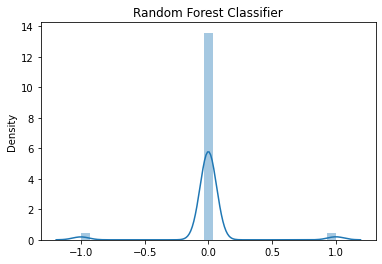

In [76]:
plt.title("Random Forest Classifier")
sns.distplot(y_test-ypred_rfc)

> RAndom forest gives normal distribution and min difference between real value and predicted. 

In [89]:
from sklearn.model_selection import KFold
kfold_validation=KFold(10)   
from sklearn.model_selection import cross_val_score
results=cross_val_score(rfc,x_train_res,y_train_res,cv=kfold_validation)
print("Accuracy after k fold for RFC :",np.mean(results))

Accuracy after k fold for RFC : 0.9674245014245013


In [96]:
# testing accuracy
adb.score(x_test,y_test)

0.8758542141230068

In [98]:
# training accuracy
adb.score(x_train_res,y_train_res)

0.8976599526066351